In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
quandl.ApiConfig.api_key = ''
stock_data = quandl.get('NSE/TCS', start_date = '2018-12-1', end_date = '2018-12-31')

In [27]:
data = pd.DataFrame(stock_data)
data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-12-03,1984.00,1990.00,1968.30,1984.00,1982.40,1610576.0,31868.00
2018-12-04,1983.00,2019.40,1971.00,2009.85,2010.85,3270615.0,65568.23
2018-12-05,2006.00,2018.00,1985.00,2003.90,2006.75,2501539.0,50131.23
2018-12-06,1998.00,2017.00,1979.60,1990.00,1992.70,2321216.0,46373.71
2018-12-07,1985.05,2003.90,1973.00,1999.85,1995.20,1680420.0,33463.26
2018-12-10,1975.00,2011.00,1960.00,1961.00,1975.80,2010786.0,39990.73
2018-12-11,1970.00,2010.00,1961.00,1997.05,2000.00,2942014.0,58636.26
2018-12-12,2001.10,2022.00,1984.95,2016.50,2016.80,2219993.0,44663.42
2018-12-13,2024.00,2029.70,1974.50,1981.95,1982.60,3748429.0,74802.38


In [13]:
data.to_csv("Stock.csv")
data = pd.read_csv('Stock.csv')
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

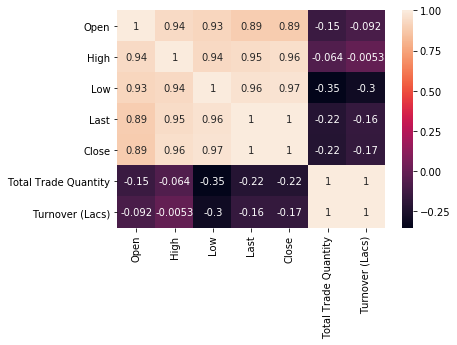

In [14]:
cor = data.corr()
sns.heatmap(cor, annot = True)

In [15]:
x = data.iloc[:,2:7]
y = data.iloc[:,1]

In [16]:
xTrain,xTest,yTrain,yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
model = LinearRegression()
model.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
model.score(xTest,yTest)

0.98032807667769

In [19]:
pred = model.predict(xTest)

In [20]:
print(pred)

[1910.54522836 1988.92246563 1896.73836622 2022.66793853]


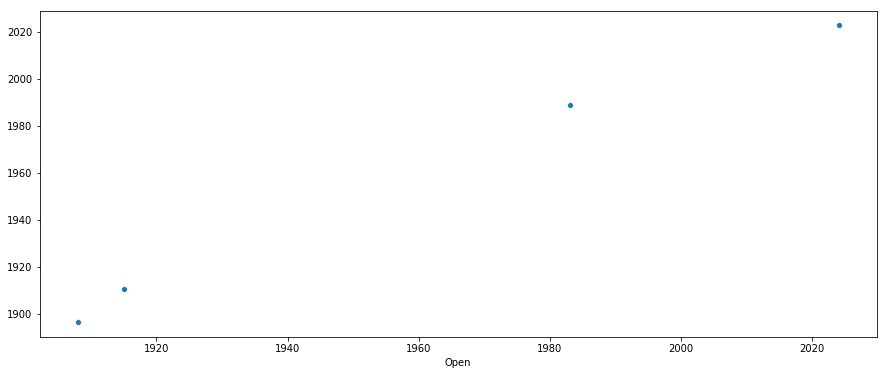

In [30]:
plt.figure(figsize = (15,6))
sns.scatterplot(yTest,pred)